### Decision Tree with Cost Complexity Pruning (ccp_alphas), Impurities, and Tree Depths


Decision Trees are a popular supervised learning algorithm used for classification and regression tasks. However, an unpruned decision tree can overfit the training data, leading to poor generalization on unseen data. In this notebook, we will:

1. Train a Decision Tree Classifier on a dataset.
2. Analyze its depth, impurity measures (Gini or Entropy), and performance.
3. Perform Cost Complexity Pruning (CCP) to reduce overfitting.
4. Evaluate the tree's accuracy at different pruning levels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
import seaborn as sns

### The Data

Lets get Seaborn Iris data from the videos

In [2]:
iris = sns.load_dataset('iris')

In [3]:
X = iris.drop(['species'], axis = 1)
y = iris['species']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

Train a Decision Tree Classifier on a dataset.
Analyze its depth, impurity measures (Gini or Entropy), and performance.

In [5]:
dtree = ''
path = ''

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
path = dtree.cost_complexity_pruning_path(X_train, y_train)

path

{'ccp_alphas': array([0.        , 0.00868056, 0.01190476, 0.01733193, 0.02018468,
        0.25904922, 0.34046294]),
 'impurities': array([0.        , 0.01736111, 0.02926587, 0.04659781, 0.06678248,
        0.3258317 , 0.66629464])}

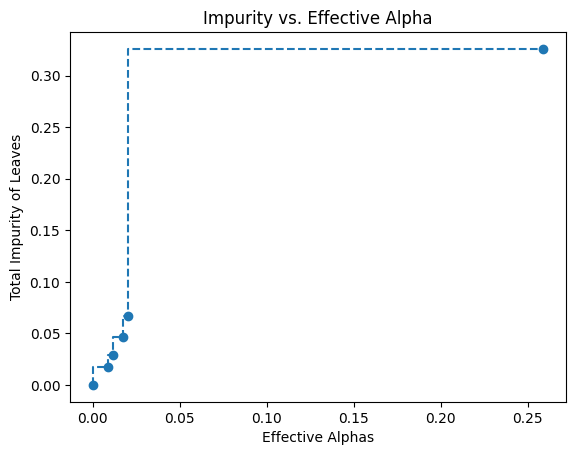

In [6]:


dtree = ''
path = ''
ccp_alphas = ''
impurities = ''

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
path = dtree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.get("ccp_alphas")
impurities = path.get("impurities")

plt.step(ccp_alphas[:-1], impurities[:-1], '--o')
plt.title('Impurity vs. Effective Alpha')
plt.xlabel('Effective Alphas')
plt.ylabel('Total Impurity of Leaves');

[15, 11, 9, 7, 5, 3, 1]
[0.         0.00868056 0.01190476 0.01733193 0.02018468 0.25904922
 0.34046294]


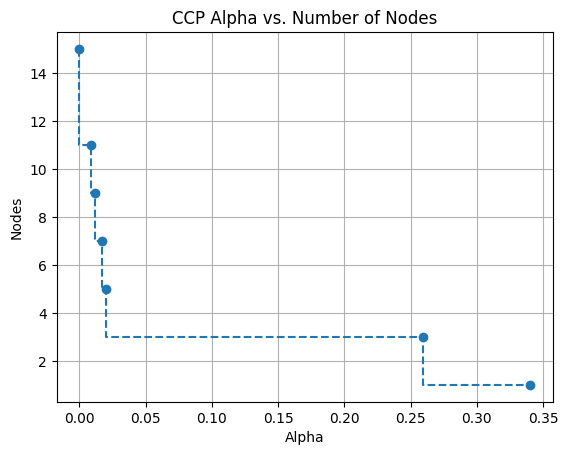

In [11]:

nodes = []
for i in ccp_alphas:
    #create decision tree and fit it
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i)
    dtree.fit(X_train, y_train)
    
    #append node count to nodes
    nodes.append(dtree.tree_.node_count)
    
    pass

print (nodes)
print (ccp_alphas)

plt.step(ccp_alphas, nodes, '--o')
plt.xlabel('Alpha')
plt.ylabel('Nodes')
plt.title('CCP Alpha vs. Number of Nodes')
plt.grid();

#### Evaluate the tree's accuracy at different pruning levels.

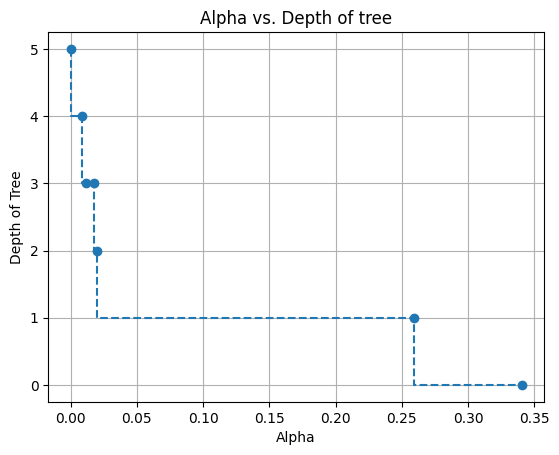

In [12]:

depths = []

for i in ccp_alphas:
    #create decision tree and fit it
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i)
    dtree.fit(X_train, y_train)
    
    #append node count to nodes
    depths.append(dtree.get_depth())
    
    pass

plt.step(ccp_alphas, depths, '--o')
plt.ylabel('Depth of Tree')
plt.xlabel('Alpha')
plt.grid()
plt.title('Alpha vs. Depth of tree');

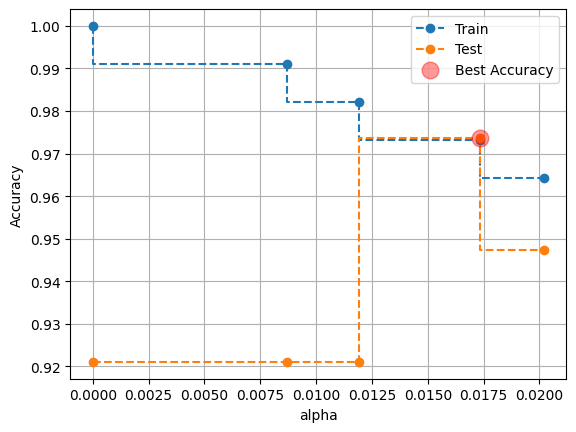

In [9]:

from sklearn.metrics import accuracy_score
train_accs = []
test_accs = []
for i in ccp_alphas[:-1]:
    
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i)
    dtree.fit(X_train, y_train)
    
    #append node count to nodes
    train_accs.append(accuracy_score(dtree.predict(X_train), y_train))
    test_accs.append(accuracy_score(dtree.predict(X_test), y_test))
    
    pass


plt.step(ccp_alphas[:-2], train_accs[:-1], '--o', label = 'Train')
plt.step(ccp_alphas[:-2], test_accs[:-1], '--o', label = 'Test')
plt.plot(ccp_alphas[np.argmax(test_accs)], max(test_accs), 'ro', markersize = 12, alpha = 0.4, label = 'Best Accuracy')
plt.legend()
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Accuracy');

#### Visualize Pruned Tree

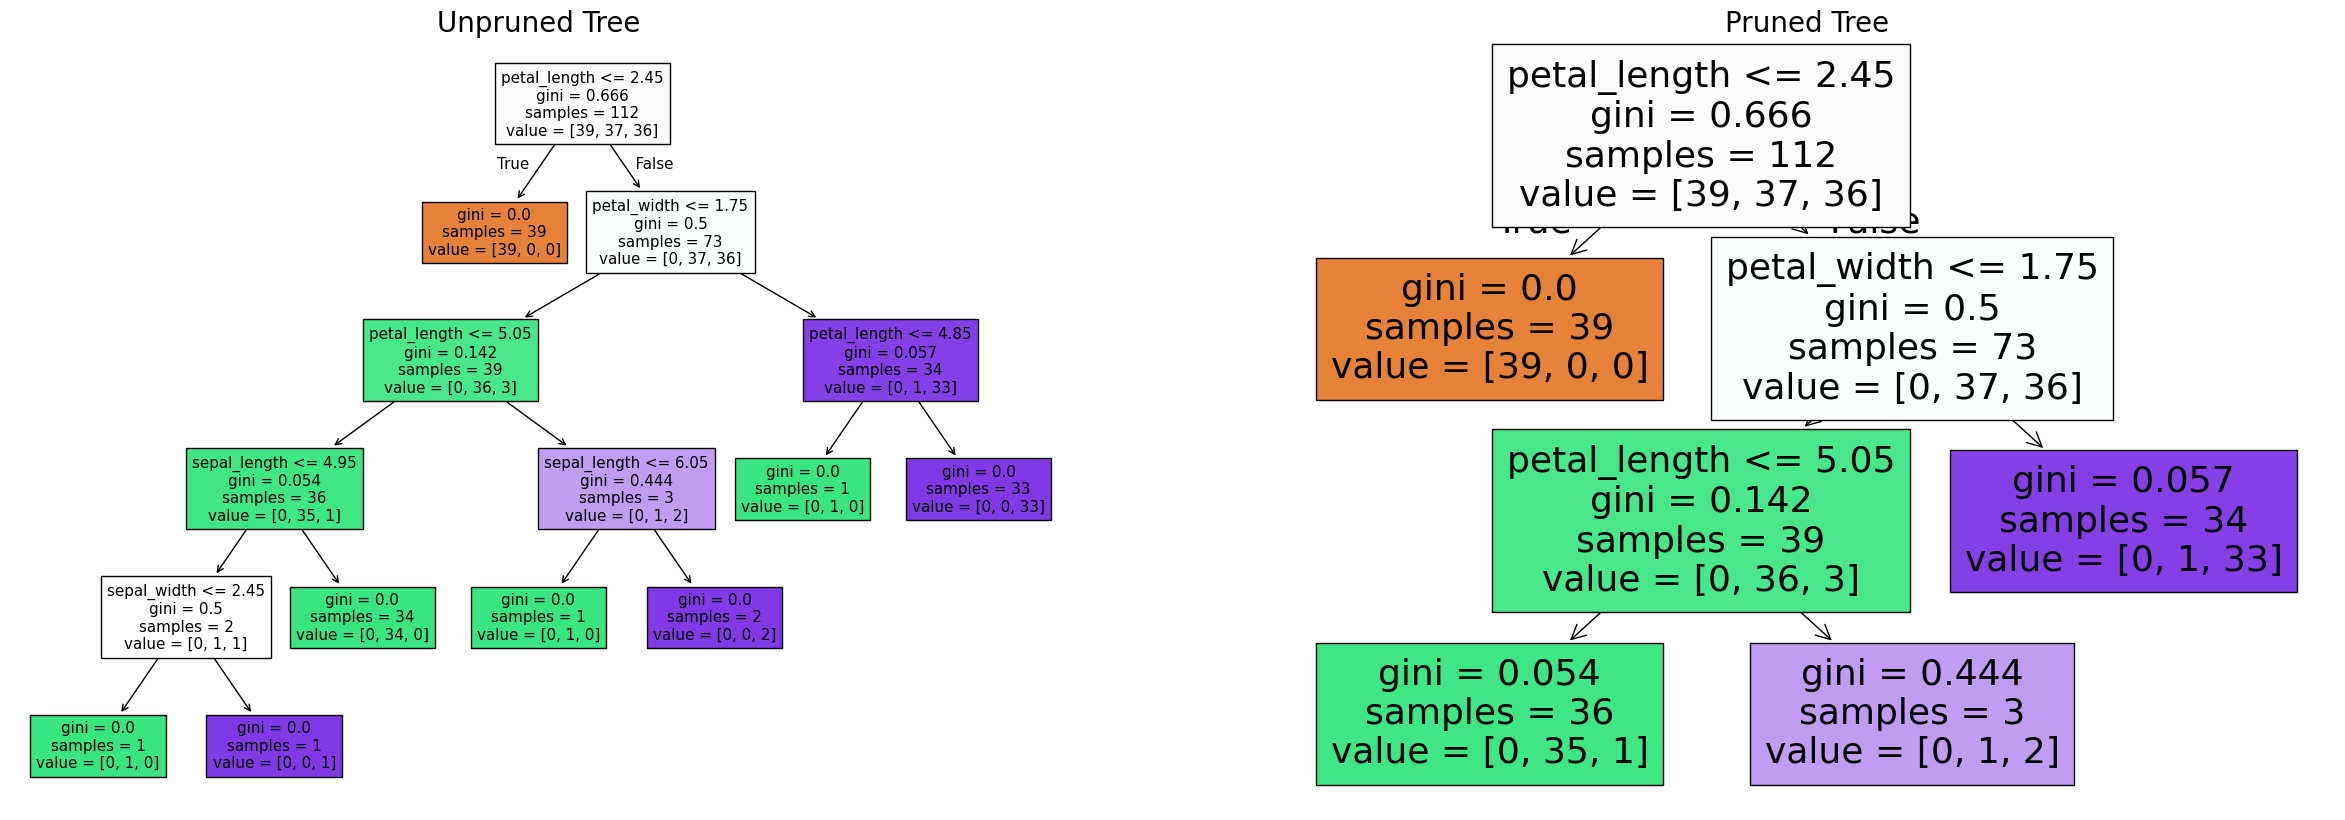

In [10]:
fig, ax = plt.subplots(1,2, figsize = (30, 10))
plot_tree(DecisionTreeClassifier(random_state=42).fit(X_train, y_train), ax = ax[0], filled = True, feature_names=X.columns);
ax[0].set_title('Unpruned Tree', fontsize = 20)
plot_tree(DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp_alphas[np.argmax(test_accs)]).fit(X_train, y_train), filled = True, feature_names = X.columns);
ax[1].set_title('Pruned Tree', fontsize = 20);